In [54]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

In [55]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

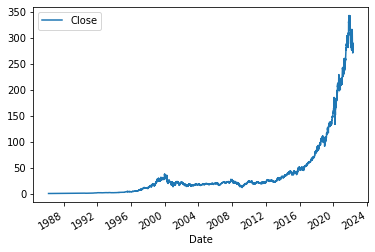

In [56]:
msft_hist.plot.line(y="Close", use_index=True)

In [57]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]


In [58]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13,0.061252,NaN
1986-03-14,0.063439,1.0
1986-03-17,0.064533,1.0
1986-03-18,0.062892,0.0
1986-03-19,0.061799,0.0


In [59]:
msft_prev = msft_hist.copy()

In [60]:
msft_prev = msft_prev.shift(1)

In [61]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055783,0.063987,0.055783,0.061252,1.031789e+09,0.0,0.0
1986-03-17,0.061252,0.064533,0.061252,0.063439,3.081600e+08,0.0,0.0
1986-03-18,0.063439,0.065080,0.063439,0.064533,1.331712e+08,0.0,0.0
1986-03-19,0.064533,0.065080,0.062345,0.062892,6.776640e+07,0.0,0.0


In [62]:
predictors = ["Open", "High", "Low", "Close", "Volume"]
data = data.join(msft_prev[predictors]).iloc[1:]
data.head(5)

,Actual_Close,Target,Open,High,Low,Close,Volume
Date,,,,,,,
1986-03-14,0.063439,1.0,0.055783,0.063987,0.055783,0.061252,1.031789e+09
1986-03-17,0.064533,1.0,0.061252,0.064533,0.061252,0.063439,3.081600e+08
1986-03-18,0.062892,0.0,0.063439,0.065080,0.063439,0.064533,1.331712e+08
1986-03-19,0.061799,0.0,0.064533,0.065080,0.062345,0.062892,6.776640e+07
1986-03-20,0.060158,0.0,0.062892,0.063439,0.061252,0.061799,4.789440e+07


In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [77]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [67]:
preds

Date
2021-12-09    1.0
2021-12-10    1.0
2021-12-13    0.0
2021-12-14    0.0
2021-12-15    1.0
             ... 
2022-04-27    1.0
2022-04-28    1.0
2022-04-29    1.0
2022-05-02    1.0
2022-05-03    1.0
Length: 100, dtype: float64

In [68]:
precision_score(test["Target"],preds)

0.48863636363636365

In [70]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
combined

,Target,Predictions
Date,,
2021-12-09,0.0,1.0
2021-12-10,1.0,1.0
2021-12-13,0.0,0.0
2021-12-14,0.0,0.0
2021-12-15,1.0,1.0
...,...,...
2022-04-27,1.0,1.0
2022-04-28,1.0,1.0
2022-04-29,0.0,1.0


<AxesSubplot:xlabel='Date'>

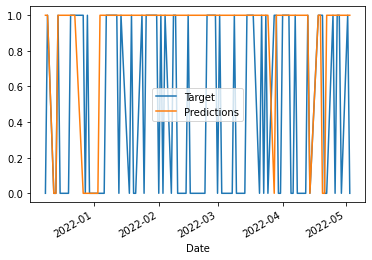

In [71]:
combined.plot()

In [95]:
start = 1000
step = 750

def backtest(data,model,predictors, start=1000, step=750): 
    predictions = []
    for i in range(start, data.shape[0], step):

        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train["Target"])

        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds [preds > .6] = 1
        preds [preds <= .6] = 0

        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    predictions = pd.concat(predictions) 
    return predictions

In [96]:
predictions["Predictions"].value_counts()

0.0    7377
1.0     732
Name: Predictions, dtype: int64

In [97]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [98]:
weekly_mean = data.rolling(7).mean()
quaterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()


weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [100]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quaterly_mean"] = quaterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quaterly_mean"] = data["annual_mean"] / data["quaterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

full_predictors = predictors + ["weekly_mean","quaterly_mean","annual_mean","annual_weekly_mean","annual_quaterly_mean","weekly_trend","open_close_ratio","high_close_ratio","low_close_ratio"]



In [101]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [102]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5660919540229885

In [103]:
predictions["Predictions"].value_counts()

0.0    7396
1.0     348
Name: Predictions, dtype: int64